In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as ply
import pandas as pd
import io
from google.colab import files
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Metal Music ratings and review counts from Amazon
## 1. Introducción
Cogemos scraped data de la categoría de Metal
https://www.kaggle.com/datasets/patkle/metal-music-ratings-and-review-counts-from-amazon de la que vamos a hacer un EDA (Exploratory Data Analyisis). Albums, DVD's, CD's, vinilos, etc. de artistas musicales de **METAL**
##2. ¿Que tenemos por columnas?
El asin (Amazon Standard Identification Number) se puede utilizar como identificador único en todas las filas.
*   **artist** *(Artista de metal autor del producto en venta)*: cualitativa **nominal**, tipo **str**. Artista de metal autor del producto en venta
*   **asin** *(Identificasdor estándar de Amazon para el producto)*: cualitativa **nominal**, tipo **str**.
*   **media** *(Medio en el que se comercializa el producto)*: variable cualitativa **nominal**, tipo **str**. 
*   **review_count** *(Numero de usuarios que han realizado una reseña o número de reseñas que tiene el producto)*: variable cuantitativa **discreta**, tipo **int**.
*   **star_rating** *(Puntuación media de 1-5)*: variable cuantitativa **continua**, tipo **float**. 
*   **title** *(Nombre del producto)*: variable cualitativa **nominal**, tipo **str**
*   **year** *(Año de lanzamiento)*: variable cualitativa **ordinal**, tipo **str**








## Jugando con Pandas

In [ ]:
uploaded = files.upload()

Saving metal.csv to metal (2).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['metal.csv']))
df.head()

,artist,asin,media,review_count,star_rating,title,year
0,Motörhead,B000A14OI8,"Audio CD,MP3 Music",136,4.9,BBC Live & in Session,2008
1,Inquisition,B08KMFYQMV,"Audio CD,MP3 Music,Vinyl",134,4.9,Black Mass for a Mass Grave,2020
2,King Buffalo,B09JVM31QY,"Vinyl,MP3 Music,Audio CD",130,4.9,Dead Star,2022
3,Helloween,B09RKMZDKR,"Vinyl,MP3 Music",126,4.9,Helloween Blue/White Marbled,2022
4,Scar Symmetry,B00190KZBO,"Audio CD,MP3 Music",125,4.9,Holographic Universe,2008


##**AQUÍ** para recuperar la cordura

Aquí como primer paso cargamos los datos de la tabla


In [ ]:
df = pd.read_csv('/content/metal.csv')                                      #si está separado por tabulaciones se usa pd.read_csv('/path.csv' , sep = '\t')

con df.head(n) podemos hacer como un display(df) pero unicamente de los n primeros elementos de la parte superior de nuestra tabla, con df.tail() sería la cola

In [ ]:
df.head(3) #df.head() #pa ver sólo lo de arriba más limpio #df.tail() para ver los últimos registros

,artist,asin,media,review_count,star_rating,title,year
0,Motörhead,B000A14OI8,"Audio CD,MP3 Music",136,4.9,BBC Live & in Session,2008
1,Inquisition,B08KMFYQMV,"Audio CD,MP3 Music,Vinyl",134,4.9,Black Mass for a Mass Grave,2020
2,King Buffalo,B09JVM31QY,"Vinyl,MP3 Music,Audio CD",130,4.9,Dead Star,2022


Como vemos **Asin** es un identificador único $\Longrightarrow$ **primary key**, podemos localizar los dujplicados de esta forma

In [ ]:
df.loc[df.duplicated(subset=['asin'])]

,artist,asin,media,review_count,star_rating,title,year


In [ ]:
#print(df.columns) #nombre columnas
#print(df.index) #número de filas y pasos de 1

## Empezamos a cambiar los tipos de los datos

df.info() para así ver el número de registros, y cada campo con el numero de valores y tipo

In [ ]:
#df.dtypes para el tipo de variable en cada campo or defecto los datos que no entiende les llama objetos con comillas delante y deatrás
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        6360 non-null   object 
 1   asin          6380 non-null   object 
 2   media         6380 non-null   object 
 3   review_count  6380 non-null   int64  
 4   star_rating   6380 non-null   float64
 5   title         6380 non-null   object 
 6   year          6130 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 349.0+ KB


Como podemos ver sólo hay 6130 registros de 'year' de uin total de 6380, faltan 250

In [ ]:
type(df['year'][0]) #me devuelve el valor asociado a la primera posicion de la columna 'year'
#por defecto añade comillas al principio y final y entonces reconoce un string

str

para localizar los valores 250 nulos que aparecen en el campo 'year' aplicamos un filtro como sigue

In [ ]:
df[df['year'].isnull()] #es lo mismo df.year que df['year']

,artist,asin,media,review_count,star_rating,title,year
32,Halestorm,B0B3HPJ8QR,"Vinyl,MP3 Music",236,4.9,Halestorm - Back From The Dead (Clear Red Viny...,NaN
59,George Strait,B00ZYBI84U,DVD,1400,4.9,George Strait/The Cowboy Rides Away: Live from...,NaN
143,NaN,B09Q8YMLYK,"Audio CD,MP3 Music,Vinyl",104,4.9,Lost In The Waves (The Complete Editon),NaN
151,Ozzy Osbourne,B000026X3R,"Audio CD,Vinyl",42,5.0,See You On The Other Side,NaN
191,D.R.I.,B00000DTNF,"Audio CD,MP3 Music,Vinyl,Audio, Cassette",78,4.9,Four of a Kind,NaN
...,...,...,...,...,...,...,...
6247,Saga,B000025A9T,"Audio CD,MP3 Music,Vinyl",99,4.7,Full Circle,NaN
6273,Def Leppard,B00005RZPJ,DVD,97,4.7,Def Leppard - Visualize / Video Archive,NaN
6308,Stryper,B000MV8ZZ4,DVD,96,4.7,Stryper: Greatest Hits - Live in Puerto Rico,NaN
6313,Saxon,B0000929XA,"Audio CD,Vinyl,Audio, Cassette",96,4.7,"Saxon - Solid Ball Of Rock - Virgin - 261 114,...",NaN


Ahora toca decidir que hacer con ellos, podemos sustituir por la media de toda la columna? o rellenamos los más altos en el Ranking y el resto les metemos una media y pista

In [ ]:
df[ ['artist', 'asin', 'title', 'media'] ] = df[['artist', 'asin', 'title', 'media']].astype("string")
# df = df.astype({'Fee':'float','Discount':'float'}) más limpio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        6360 non-null   string 
 1   asin          6380 non-null   string 
 2   media         6380 non-null   string 
 3   review_count  6380 non-null   int64  
 4   star_rating   6380 non-null   float64
 5   title         6380 non-null   string 
 6   year          6130 non-null   object 
dtypes: float64(1), int64(1), object(1), string(4)
memory usage: 349.0+ KB


In [ ]:
df['media'] = df['media'].str.split(',')
df['media']

# NO EJECUTAR DOS VECES

0              [Audio CD, MP3 Music]
1       [Audio CD, MP3 Music, Vinyl]
2       [Vinyl, MP3 Music, Audio CD]
3                 [Vinyl, MP3 Music]
4              [Audio CD, MP3 Music]
                    ...             
6375    [Audio CD, Audio,  Cassette]
6376                      [Audio CD]
6377    [Audio CD, MP3 Music, Vinyl]
6378    [Audio CD, MP3 Music, Vinyl]
6379    [Vinyl, MP3 Music, Audio CD]
Name: media, Length: 6380, dtype: object

Ahora el campo 'media' es un object

In [ ]:
df.media[68]

['Audio CD', 'MP3 Music', 'Vinyl', 'Audio', ' Cassette']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        6360 non-null   string 
 1   asin          6380 non-null   string 
 2   media         6380 non-null   object 
 3   review_count  6380 non-null   int64  
 4   star_rating   6380 non-null   float64
 5   title         6380 non-null   string 
 6   year          6130 non-null   object 
dtypes: float64(1), int64(1), object(2), string(3)
memory usage: 349.0+ KB


*df['year'] = df['year'].astype(float)* no funciona al tener valores nulos, se pueden sustituir por una media??

Lo que debemos hacer es especificar en la  función pd.to_numeric() el tipo de errors = 'coerce' al aparecer NaN nulos. De esta dorma podremos tratare los datos estadísticamente después.

In [ ]:
df['year'] = pd.to_numeric(df['year'], errors = 'coerce', downcast = "float")
#df['year'].isnull().sum() #me devuelve cuantos nulos tengo

Ahora le pedimos que nos describa los datos para calcular el año medio (con el que podríamos substituir 

In [ ]:
df.describe()

,review_count,star_rating,year
count,6380.000000,6380.000000,6050.000000
mean,485.902978,4.765752,2009.794434
std,944.222457,0.067387,9.818103
min,18.000000,4.700000,1970.000000
25%,104.750000,4.700000,2003.000000
50%,208.000000,4.800000,2012.000000
75%,496.000000,4.800000,2018.000000
max,28547.000000,5.000000,2023.000000


## Tratamiento estadístico suponiendo una dist. normal

Ahora vamos a coger el valor que tenemos de los cuartiles 1 y 3 para calcular el IQR de la forma 

$IQR = Q_3 - Q_1$

como en el *df.describe()* nos devuelve, por ejemplo, para el caso *'review_counts'*

$Q_1=104,75≈105$ *(No se puede tener unna reseña decimal)*

$Q_2=208$

$Q_3=496$

vemos que entonces el rango intercuartil:

$IQR = 496 -104,75 =391$ 

See puede almacenar los datos describidos en una serie de datos y acceder a ellos por el índice de la siguiente forma.

In [ ]:
serieReviewCount = df['review_count'].describe()
Q_1 = serieReviewCount['25%'] #se puede usar la función df['review_count'].quantile(q = 0.25)
Q_2 = serieReviewCount['50%']
Q_3 = serieReviewCount['75%']
IQR = Q_3 - Q_1
minimo = Q_1 - 1.5*IQR #si es negativo lo fijo a 0 en este caso
maximo = Q_3 + 1.5*IQR
print(minimo, Q_2, maximo)

-482.125 208.0 1082.875


Tenemos un mínimo negativo para 'review_count`que no tiene sentido ninguno. Esto es por suponer que sigue una distribución normal y no es así.

Para ver cual podría ser a ojo, ploteamos el histograma, parace una distribución de Poisson $\left(P[X]=\dfrac{e^{-\lambda}\lambda^k}{k!}\right)$?? $\chi^2$??

 Ni idea pero seguimos


Graficamos el histograma original sin filtar

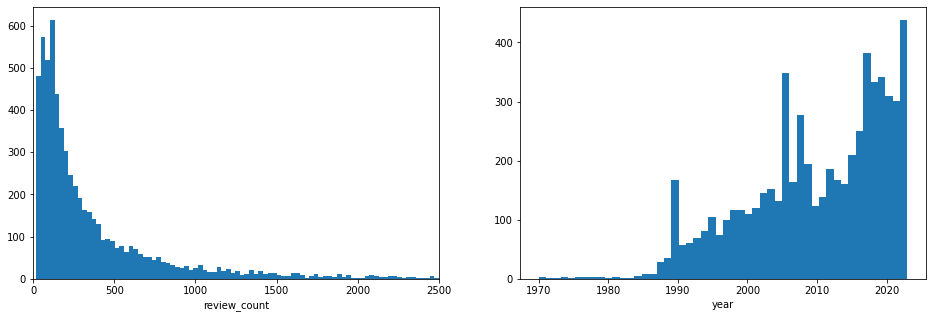

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5)) # preparar un gráfico con matplotlib
ax[0].hist(df['review_count'], 1000);
ax[0].set_xlim(0,2500)
ax[0].set_xlabel('review_count')
ax[1].hist(df['year'], 50);
ax[1].set_xlabel('year');
plt.show()

**chipo(0:5, 3: )**
traeme las primeras 5 columnas (0, 1, 2, 3, 4) y muestrame las columnas de la tercera en adelante

In [ ]:
df[(df['year'] > 2000) & (df['year'] < 2010)].head() #para poder aplicar varios filtros por publicados entre 2000 y 2010

,artist,asin,media,review_count,star_rating,title,year
0,Motörhead,B000A14OI8,"[Audio, CD,MP3, Music]",136,4.9,BBC Live & in Session,2008.0
4,Scar Symmetry,B00190KZBO,"[Audio, CD,MP3, Music]",125,4.9,Holographic Universe,2008.0
14,Steve Vai,B002LBGB4A,"[Audio, CD,MP3, Music,Vinyl]",117,4.9,Where The Wild Things Are,2009.0
23,Lynyrd Skynyrd,B000B8I8I2,"[Audio, CD,Vinyl,Audio,, Cassette]",146,4.9,Gimme Back My Bullets,2006.0
24,The Exploited,B00005QTNK,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",146,4.9,Punks Not Dead,2001.0


Vamos a filtrar la tabla y creas dos tablas, una desde el máximo parriba y otra desde el mínimo, como el mínimo es negativo sólo hago una

In [ ]:
df[df['review_count'] > maximo]#head() #bastantes elementos 647 de 6380

,artist,asin,media,review_count,star_rating,title,year,century
50,Pink Floyd,B000091K1L,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",6906,4.9,Wish You Were Here,1975.0,No
51,Nirvana,B000003TB9,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",4186,4.9,MTV Unplugged in New York,1994.0,No
52,Def Leppard,B000001FKY,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",4009,4.9,Hysteria,1987.0,No
53,Rammstein,B073G3ZLDJ,"[Vinyl,MP3, Music,Audio, CD]",2883,4.9,Mutter,2017.0,Yes
54,System of a Down,B07FSVYRXJ,"[Vinyl,Audio, CD]",2051,4.9,Toxicity,2018.0,Yes
...,...,...,...,...,...,...,...,...
3162,REO Speedwagon,B0000026JA,"[Audio, CD,Audio, CD]",1872,4.7,REO Speedwagon The Hits,1988.0,No
3163,The Who,B00006NSCK,"[Audio, CD,MP3, Music]",1894,4.7,Ultimate Collection,2002.0,Yes
3164,Korn,B09KNM2C47,"[Audio, CD,MP3, Music,Vinyl]",1814,4.7,Requiem,2022.0,Yes
3469,Godsmack,B00LQ6TM88,"[Audio, CD,MP3, Music,Vinyl]",1099,4.7,1000HP,2014.0,Yes


Graficamos filtrando los outlayers por debajo del máximo

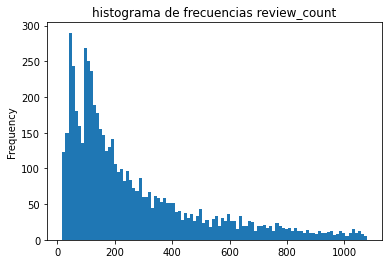

In [ ]:
ax = df[df['review_count'] < maximo]['review_count'].plot(kind="hist", bins=100, title = 'histograma de frecuencias review_count') #hago un histograma filtrando outlayers
plt.show() 

Ahora filtramos por los minimos

In [ ]:
df[df['review_count'] < minimo] #el mínimo está mal definido así que estará vacía

,artist,asin,media,review_count,star_rating,title,year


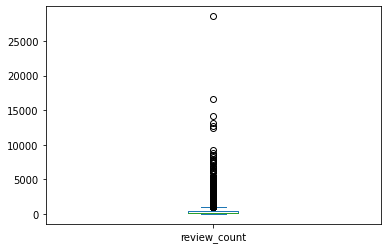

In [ ]:
df[(df['review_count'] > minimo)]['review_count'].plot(kind="box")
plt.show()

Filtrandolo por todos los outlayers


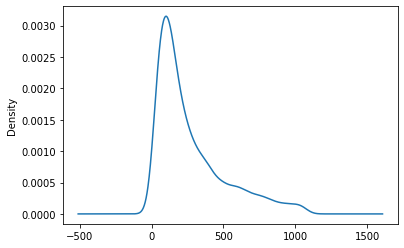

In [ ]:
df[(df['review_count'] > minimo) & (df['review_count'] < maximo)]['review_count'].plot(kind="kde") # kind = "hist" "kde"
plt.show()

Graficamos todas las variables númerica

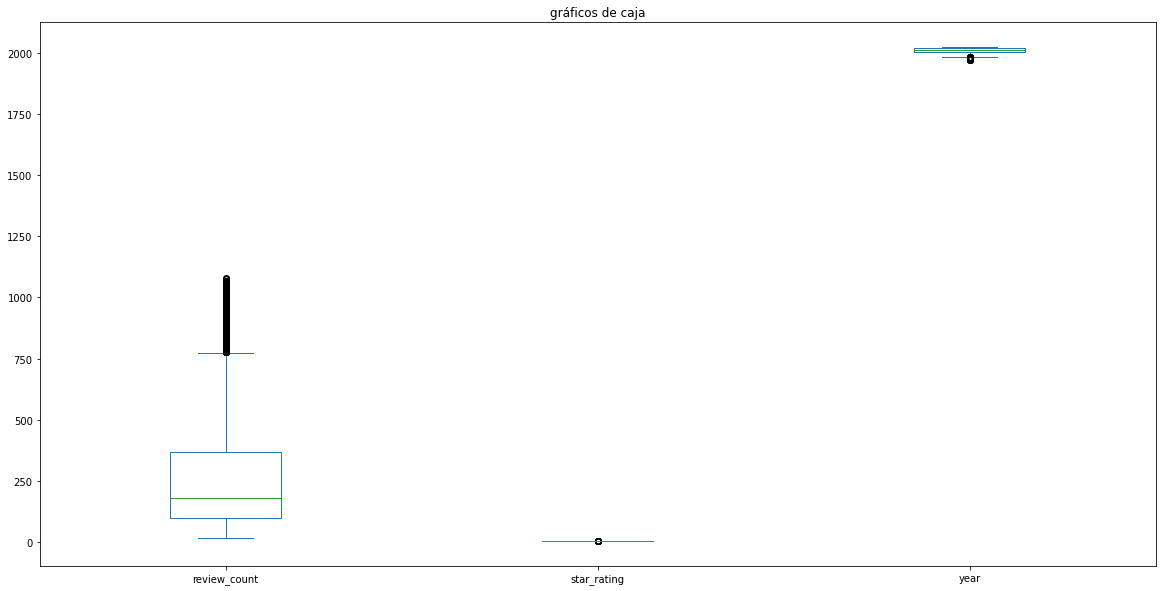

In [ ]:
ax = df[(df['review_count'] > minimo) & (df['review_count'] < maximo)].plot(kind="box", figsize = (20,10), title= 'gráficos de caja')


### Jugando con plotly.express

In [ ]:
import plotly.express as px # aquí nos estamos trayendo una librería, dónde tenemos que poner este import???????

px.box(df, y = df[(df['review_count'] > minimo) & (df['review_count'] < maximo)]['review_count'],  notched=True) #notched = True cambia la forma

Hacemos un subplot con matplotlib.pyplot

### Jugando con matplotlib

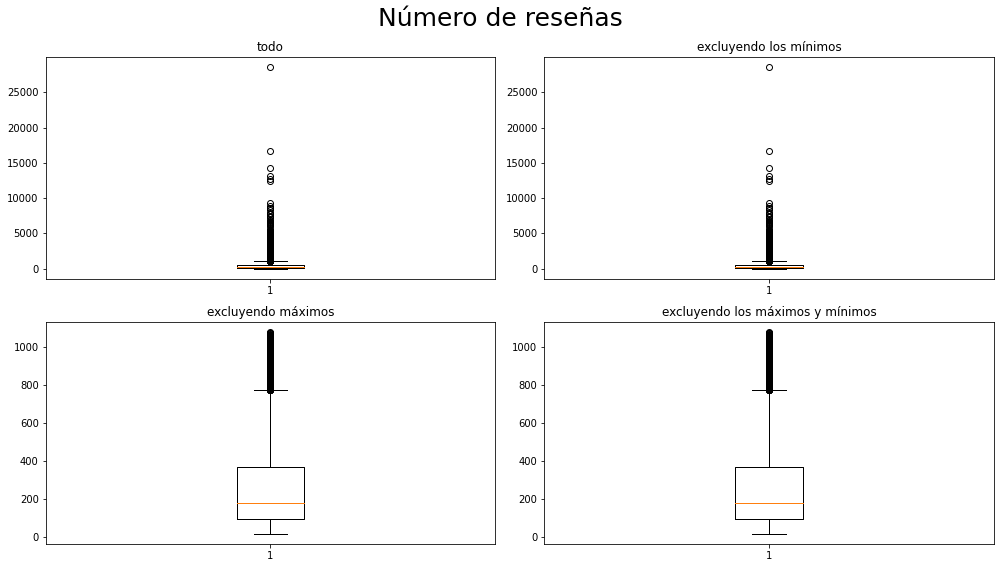

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
ax[0][0].boxplot(df['review_count']);
ax[0][0].set_title('todo')
ax[0][1].boxplot(df[(df['review_count'] > minimo)]['review_count']); #& ]
ax[0][1].set_title('excluyendo los mínimos')
ax[1][0].boxplot(df[(df['review_count'] < maximo)]['review_count']); #& ]
ax[1][0].set_title('excluyendo máximos')
ax[1][1].boxplot(df[(df['review_count'] > minimo) & (df['review_count'] < maximo)]['review_count'])
ax[1][1].set_title('excluyendo los máximos y mínimos')

fig.suptitle('Número de reseñas', fontsize=25)
fig.tight_layout()

### Subplots con **plotly**

Como no tiene sentido filtrar por mínimos como vimos en el subplot de matplotlib
utilizamos solo dos subplots

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


trace1 = go.Box(y = df['review_count'], name='sin filtrar')
trace2 = go.Box(y = df[(df['review_count'] > minimo) & (df['review_count'] < maximo)]['review_count'], name='filtrado')

fig = make_subplots(rows=1, cols=2)

fig.append_trace(trace1, row = 1, col = 1)
fig.append_trace(trace2, row = 1, col = 2)

fig.show()

### Hay correlación en los datos?

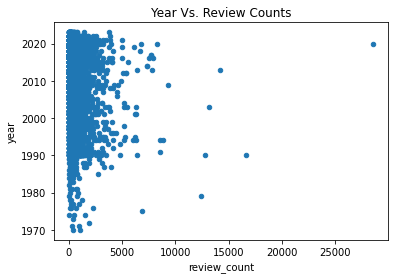

In [ ]:
ax = df.plot(kind="scatter", x='review_count', y='year', title='Year Vs. Review Counts')
ax.set_xlabel('review_count')
ax.set_ylabel('year')
plt.show()

No mucha la verdad...

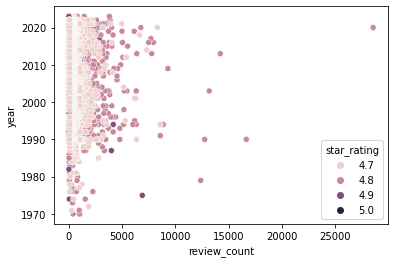

In [ ]:
sns.scatterplot(x='review_count', y='year', hue='star_rating', data=df)
plt.show()

Si calculamos la matriz de correlación veremos que tal va

In [ ]:
df_corr = df[['review_count', 'star_rating', 'year']].corr()
df_corr

,review_count,star_rating,year
review_count,1.000000,-0.030487,-0.137591
star_rating,-0.030487,1.000000,0.149914
year,-0.137591,0.149914,1.000000


Parece que nanai de la china, se ve más graficamente aquí, cuanto más claro más correlación

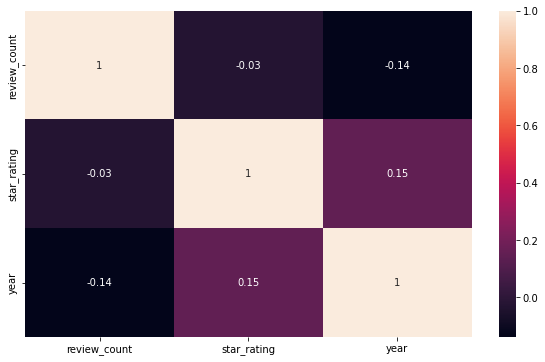

In [ ]:
fig, ax = plt.subplots(figsize= (10,6))
sns.heatmap(df_corr, annot = True, ax=ax)
plt.show()

parece que nada, podemos ver las gráficas de todos los campos númericos gracias a seaborn de la forma


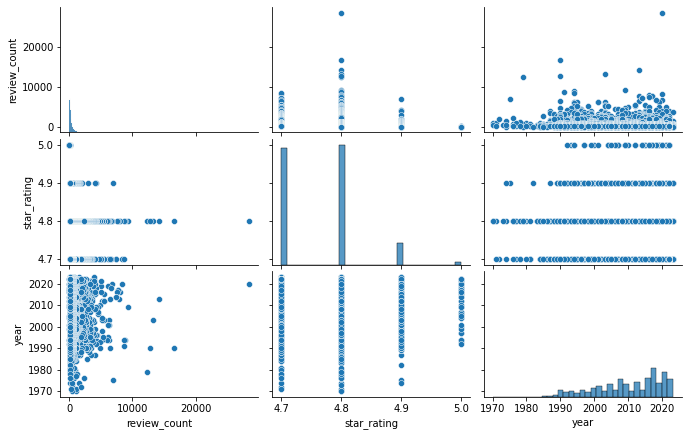

In [ ]:
g = sns.pairplot(df, vars = ['review_count', 'star_rating', 'year'])
g.fig.set_figheight(6)
g.fig.set_figwidth(10)
plt.show()

## Creamos nuestra primera métrica

In [ ]:
nuevo_milenio = df.groupby(df[df['year'] > 2000]['year']) \
           .agg(['count', 'sum', 'mean']) \
           [['review_count']]
nuevo_milenio

review_count                    
              count     sum        mean
year                                   
2001.0          120   73684  614.033333
2002.0          146   80456  551.068493
2003.0          152  125648  826.631579
2004.0          131   66423  507.045802
2005.0          177   68561  387.350282
2006.0          172   68450  397.965116
2007.0          164   69279  422.432927
2008.0          277  128129  462.559567
2009.0          195  105755  542.333333
2010.0          123   54201  440.658537
2011.0          138   51927  376.282609
2012.0          186   65373  351.467742
2013.0          167  109103  653.311377
2014.0          160   91167  569.793750
2015.0          210   93060  443.142857
2016.0          250  105814  423.256000
2017.0          383  114654  299.357702
2018.0          333  100206  300.918919
2019.0          342  105191  307.576023
2020.0          310  154647  498.861290
2021.0          301  120181  399.272425
2022.0          394  101810  258.401015
2023.0           44   14755  335.340909

Graficamos el número de reseñas agrupado por años y el valor medio de reseñas hechas en ese año

In [ ]:
ycount = nuevo_milenio.review_count['count']
ymean = nuevo_milenio.review_count['mean']
px.bar(nuevo_milenio['review_count'], y = [ycount, ymean])

Y si queremos ver por puntuación, cuantas artistas con reseñas tenemos, número de reseñas, media de reseñas por articulo.

In [ ]:
puntuaciones = df.groupby(df['star_rating']) \
          .agg(['count', 'sum','mean'])\
          [['review_count']]
puntuaciones

review_count                     
                   count      sum        mean
star_rating                                  
4.7                 2852  1281439  449.312412
4.8                 2924  1724533  589.785568
4.9                  541    92179  170.386322
5.0                   63     1910   30.317460

In [ ]:
ycount = puntuaciones.review_count['count']
ymean = puntuaciones.review_count['mean']
px.bar(puntuaciones['review_count'], y = [ycount, ymean])

También se puede agrupar por un artista en concreto para ver cuantos articulops valorados tiene, reseñas y valoración media.

In [ ]:
df.groupby(df[df['artist'] == 'Whitesnake']['artist']).agg(['count', 'sum', 'mean'])['review_count']

,count,sum,mean
artist,,,
Whitesnake,15,5964,397.6


Podemos pedir que se nos muestre el total de articulos en tabla de la forma

In [ ]:
df.query('artist == "Whitesnake"')

,artist,asin,media,review_count,star_rating,title,year
865,Whitesnake,B000000OMP,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",690,4.8,Slide It in,1990.0
3147,Whitesnake,B000024DWW,"[Audio, CD,Vinyl,Audio,, Cassette]",895,4.7,Greatest Hits,2008.0
3236,Whitesnake,B000000OPZ,"[Audio, CD,MP3, Music,Vinyl]",787,4.7,Whitesnake,1990.0
3533,Whitesnake,B000000OZ8,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",577,4.7,Slip of the Tongue,1996.0
3620,Whitesnake,B0027HB9UY,"[Audio, CD,Vinyl,Audio,, Cassette]",523,4.7,Slide It In: 25th Anniversary Expanded Edition,NaN
3781,Whitesnake,B000K4X2UQ,"[Audio, CD,Vinyl,Audio,, Cassette]",443,4.7,Live in the Heart of the City,2007.0
3884,Whitesnake,B000EXZDOQ,"[Audio, CD,MP3, Music,Vinyl]",402,4.7,Ready an' Willing,2006.0
4159,Whitesnake,B000K2Q5XE,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",328,4.7,Saints & Sinners,2007.0
4163,Whitesnake,B000VULR3I,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",328,4.7,Saints and Sinners [LP Vinyl],NaN
4197,Whitesnake,B000K2Q5X4,"[Audio, CD,Vinyl]",318,4.7,Come an' Get It,2007.0


primero hacemos un histograma y vemos que cuando menos reseñas te hacen, mejor puntuación obtienes

In [ ]:
px.histogram(df, x ='star_rating', y='review_count', nbins = 10)

## creamos columna nueva que nos lo han pedido


In [ ]:
df['Century'] = df['year'] > 2000

In [ ]:
df.tail(5)

,artist,asin,media,review_count,star_rating,title,year,century,Century
6375,Whitesnake,B000006TNQ,"[Audio, CD,Audio,, Cassette]",92,4.7,Restless Heart,1998.0,No,False
6376,"Bowie, David",B00004Y7WV,"[Audio, CD]",92,4.7,Bowie at Beeb: Best Of Of BBC Radio 68-72,2000.0,No,False
6377,Atheist,B000AL8VNW,"[Audio, CD,MP3, Music,Vinyl]",92,4.7,Piece of Time,2005.0,Yes,True
6378,Converge,B002N1AE8W,"[Audio, CD,MP3, Music,Vinyl]",92,4.7,Axe To Fall,2009.0,Yes,True
6379,FM,B00THJPIB6,"[Vinyl,MP3, Music,Audio, CD]",92,4.7,Heroes And Villains,2017.0,Yes,True


La renombramos

In [ ]:
df = df.rename(columns = {'Century' : 'century'})

In [ ]:
df.head(5)

,artist,asin,media,review_count,star_rating,title,year,century
0,Motörhead,B000A14OI8,"[Audio, CD,MP3, Music]",136,4.9,BBC Live & in Session,2008.0,True
1,Inquisition,B08KMFYQMV,"[Audio, CD,MP3, Music,Vinyl]",134,4.9,Black Mass for a Mass Grave,2020.0,True
2,King Buffalo,B09JVM31QY,"[Vinyl,MP3, Music,Audio, CD]",130,4.9,Dead Star,2022.0,True
3,Helloween,B09RKMZDKR,"[Vinyl,MP3, Music]",126,4.9,Helloween Blue/White Marbled,2022.0,True
4,Scar Symmetry,B00190KZBO,"[Audio, CD,MP3, Music]",125,4.9,Holographic Universe,2008.0,True


La xconberthinos de booleano a texto

In [ ]:
df['century'] = df['century'].astype("string")

Aplicamos el metodo .replace() para renumbra cada elemento de la serie

In [ ]:
df['century'] = df['century'].str.replace('True', 'Yes').str.replace('False', 'No')

El top 5 de articulos con más reseñas

In [ ]:
df.sort_values(by = 'review_count',  ascending = False).head(5)

,artist,asin,media,review_count,star_rating,title,year,century
212,AC/DC,B08PX93V6X,"[Audio, Cassette,MP3, Music,Audio, CD,Vinyl]",28547,4.8,Power Up,2020.0,Yes
207,The Beatles,B000002UB4,"[Audio,, Cassette,MP3, Music,Audio, CD,Vinyl]",16650,4.8,Abbey Road,1990.0,No
203,Nirvana,B0000088DC,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",14213,4.8,Nevermind,2013.0,Yes
204,AC/DC,B0000CF35G,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",13182,4.8,Back In Black,2003.0,Yes
209,The Beatles,B000002UAV,"[Audio, Cassette,Multimedia, CD]",12757,4.8,Sgt. Pepper's Lonely Hearts Club Band,1990.0,No


## ¡¿He tratado datos duplicados?!

Vamos a demostrar que no tiene sentido tratar los duplicados por el nombre de **artista** (por el asin, media, review_count, star_rating y year ya ni me molesto... que ha nadie se le ocurra)

La tabla me muestra el nombre del artista que sale repetido al menos 2 veces, el registro que se ve es el primer valor que detecta que se repite dos veces.

In [ ]:
df.loc[df.duplicated(subset=['artist'])]

,artist,asin,media,review_count,star_rating,title,year,century
39,The Devil Wears Prada,B098GSYZC5,"[Vinyl,MP3, Music,Audio, CD]",140,4.9,ZII,2022.0,Yes
55,Nirvana,B000WQW988,"[DVD,HD, DVD]",1971,4.9,Nirvana: MTV Unplugged in New York,NaN,No
56,Lynyrd Skynyrd,B000002P74,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",1651,4.9,Second Helping,1997.0,No
62,System of a Down,B004YESKU0,"[Audio, CD]",1220,4.9,System of a Down,2011.0,Yes
67,Death,B00IQFC15I,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",1087,4.9,Leprosy,2014.0,Yes
...,...,...,...,...,...,...,...,...
6373,Decapitated,B000CIWU6W,"[Audio, CD,MP3, Music,Vinyl]",92,4.7,Organic Hallucinosis,2008.0,Yes
6375,Whitesnake,B000006TNQ,"[Audio, CD,Audio,, Cassette]",92,4.7,Restless Heart,1998.0,No
6377,Atheist,B000AL8VNW,"[Audio, CD,MP3, Music,Vinyl]",92,4.7,Piece of Time,2005.0,Yes
6378,Converge,B002N1AE8W,"[Audio, CD,MP3, Music,Vinyl]",92,4.7,Axe To Fall,2009.0,Yes


¿Qué pasa si filtro por un nombre para ver cuantos discos tiene, tal... y que registros está duplicados?

In [ ]:
df.query('artist == "Whitesnake"')

,artist,asin,media,review_count,star_rating,title,year,century
865,Whitesnake,B000000OMP,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",690,4.8,Slide It in,1990.0,No
3147,Whitesnake,B000024DWW,"[Audio, CD,Vinyl,Audio,, Cassette]",895,4.7,Greatest Hits,2008.0,Yes
3236,Whitesnake,B000000OPZ,"[Audio, CD,MP3, Music,Vinyl]",787,4.7,Whitesnake,1990.0,No
3533,Whitesnake,B000000OZ8,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",577,4.7,Slip of the Tongue,1996.0,No
3620,Whitesnake,B0027HB9UY,"[Audio, CD,Vinyl,Audio,, Cassette]",523,4.7,Slide It In: 25th Anniversary Expanded Edition,NaN,No
3781,Whitesnake,B000K4X2UQ,"[Audio, CD,Vinyl,Audio,, Cassette]",443,4.7,Live in the Heart of the City,2007.0,Yes
3884,Whitesnake,B000EXZDOQ,"[Audio, CD,MP3, Music,Vinyl]",402,4.7,Ready an' Willing,2006.0,Yes
4159,Whitesnake,B000K2Q5XE,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",328,4.7,Saints & Sinners,2007.0,Yes
4163,Whitesnake,B000VULR3I,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",328,4.7,Saints and Sinners [LP Vinyl],NaN,No
4197,Whitesnake,B000K2Q5X4,"[Audio, CD,Vinyl]",318,4.7,Come an' Get It,2007.0,Yes


Lo que vamos a hacer es fijarnos en el **título** que es un distintivo del album, cd, vinilo o lo que sea que sacó el artista

In [ ]:
df.loc[df.duplicated(subset=['title'])]

,artist,asin,media,review_count,star_rating,title,year,century
69,Death,B01DD5N2TE,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",1054,4.9,Scream Bloody Gore,2016.0,Yes
97,BLACK SABBATH,B08DDK4T2M,"[Audio, CD,Vinyl]",425,4.9,Paranoid,2020.0,Yes
113,IRON MAIDEN,B0863TKWJY,"[Audio, CD]",637,4.9,Live After Death,2020.0,Yes
118,Sabaton,B01GUBRPKK,"[Vinyl,MP3, Music,Audio, CD]",559,4.9,The Last Stand,2016.0,Yes
123,Unleash the Archers,B06XKBSY49,"[Audio, CD,MP3, Music]",502,4.9,Apex,2022.0,Yes
...,...,...,...,...,...,...,...,...
6333,Possessed,B07PNKDZR4,"[Vinyl,MP3, Music,Audio, CD]",95,4.7,Revelations Of Oblivion,2019.0,Yes
6340,Black N Blue,B00005LNHQ,"[Audio, CD,MP3, Music]",94,4.7,Ultimate Collection,2001.0,Yes
6358,D.R.I.,B003DC87WU,"[Vinyl,MP3, Music]",93,4.7,Crossover: Millenium Edition,2010.0,Yes
6359,AC/DC,B001IUDXYG,"[Audio, CD]",93,4.7,Black Ice,NaN,No


In [ ]:
df.query('title == "Live After Death" ')

,artist,asin,media,review_count,star_rating,title,year,century
63,Iron Maiden,B00MGAE15C,"[Vinyl,Audio, CD]",1197,4.9,Live After Death,2014.0,Yes
113,IRON MAIDEN,B0863TKWJY,"[Audio, CD]",637,4.9,Live After Death,2020.0,Yes


In [ ]:
df.query('title == "Paranoid" ')

,artist,asin,media,review_count,star_rating,title,year,century
83,Black Sabbath,B018VEE4QW,"[Audio, CD,Vinyl]",185,4.9,Paranoid,2016.0,Yes
97,BLACK SABBATH,B08DDK4T2M,"[Audio, CD,Vinyl]",425,4.9,Paranoid,2020.0,Yes
232,Black Sabbath,B00WASEEW0,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",5535,4.8,Paranoid,2015.0,Yes
609,Black Sabbath,B001D2AYCI,"[Audio, CD,MP3, Music,Vinyl]",1184,4.8,Paranoid,2009.0,Yes


In [ ]:
df.query('title == "Scream Bloody Gore" ')

,artist,asin,media,review_count,star_rating,title,year,century
68,Death,B01DD5N2KS,"[Audio, CD,MP3, Music,Vinyl,Audio,, Cassette]",1054,4.9,Scream Bloody Gore,2016.0,Yes
69,Death,B01DD5N2TE,"[Vinyl,MP3, Music,Audio, CD,Audio,, Cassette]",1054,4.9,Scream Bloody Gore,2016.0,Yes


**¿¿LA HEMOS LIADO PARDÍSIMA... o no??** esto se hace al principio jeje 😅

## Oye y en el campo de medio tenemos la listas bien hechas??

vemos que nos las detecta como object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        6360 non-null   string 
 1   asin          6380 non-null   string 
 2   media         6380 non-null   object 
 3   review_count  6380 non-null   int64  
 4   star_rating   6380 non-null   float64
 5   title         6380 non-null   string 
 6   year          6050 non-null   float32
 7   century       6380 non-null   string 
dtypes: float32(1), float64(1), int64(1), object(1), string(4)
memory usage: 374.0+ KB


pero si accedemos a un elemento nos dice que es una lista

In [ ]:
print(df.media[68], type(df.media[68]))

['Audio CD', 'MP3 Music', 'Vinyl', 'Audio', ' Cassette'] <class 'list'>


pero en la lista nos ha dejado comas raras

Tengo que usar la función map para convertir las listas a string , ya que no soporta la función .astype() al ser una lista 😓

In [ ]:
prueba = df['media'].apply(lambda x: ','.join(map(str, x)))
prueba

0             Audio,CD,MP3,Music
1       Audio,CD,MP3,Music,Vinyl
2       Vinyl,MP3,Music,Audio,CD
3                Vinyl,MP3,Music
4             Audio,CD,MP3,Music
                  ...           
6375    Audio,CD,Audio,,Cassette
6376                    Audio,CD
6377    Audio,CD,MP3,Music,Vinyl
6378    Audio,CD,MP3,Music,Vinyl
6379    Vinyl,MP3,Music,Audio,CD
Name: media, Length: 6380, dtype: object

Volvemos a acceder al elemento 68 de la serie y vemos que hay cosas raras


In [ ]:
prueba[68]

De esta forma al aplicar el split, nos separa por las comas que reconoce, dejando un elemento vacío... vaya lio ✍


In [ ]:
prueba[68].split(',')

['Audio', 'CD', 'MP3', 'Music', 'Vinyl', 'Audio', '', 'Cassette']

Pero si yo aplico el método a toda la serie

In [ ]:
prueba.str.split(',')[68]

['Audio', 'CD', 'MP3', 'Music', 'Vinyl', 'Audio', '', 'Cassette']

**¿Por qué ahora me sale bien?** 😲 Eso ya es un problema para el Arturo del futuro